In [307]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import defaultdict


### Load the data

In [232]:
item=pd.read_csv('/Clustering grocery items /item_to_id.csv' )
item.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [233]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Item_name  48 non-null     object
 1   Item_id    48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 896.0+ bytes


In [162]:
purchase_history=pd.read_csv('/Clustering grocery items /purchase_history.csv')
purchase_history.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [15]:
purchase_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39474 entries, 0 to 39473
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  39474 non-null  int64 
 1   id       39474 non-null  object
dtypes: int64(1), object(1)
memory usage: 616.9+ KB


In [302]:
purchase_history.isnull().sum()

user_id    0
id         0
dtype: int64

### Question 1.1 The customer who bought the most items overall in her lifetime

In [83]:
purchase=purchase_history.copy()
purchase['purchase_ct']=purchase['id'].apply(lambda x:len(x.split(',')))
purchase.groupby('user_id')['purchase_ct'].sum().idxmax()

269335

#### user 269335 purchased the most items 

### Question 1.2 For each item, which customer bought that item the most?

In [199]:
user_id=[]
item_id=[]
for index,row in purchase_history.iterrows():
    items=row['id'].split(',')
    for item in items:
        item_id.append(item)
        user_id.append(row['user_id'])
purchase_item=pd.DataFrame({'user_id':user_id,'Item_id':item_id,'count':1})
purchase_item['Item_id']=pd.to_numeric(purchase_item['Item_id'])
purchase_item.to_csv('/Clustering grocery items /create_csv.csv')

In [164]:
purchase_item.head()

,user_id,Item_id,count
0,222087,27,1
1,222087,26,1
2,1343649,6,1
3,1343649,47,1
4,1343649,17,1


In [303]:
# merge the two tables 
final=pd.merge(item,purchase_item,on='Item_id',how='left')
final=final.groupby(['Item_name','user_id'])['count'].sum().reset_index()
final.loc[final.groupby(['Item_name'])['count'].idxmax()].reset_index(drop=True)

,Item_name,user_id,count
0,aluminum foil,143741,3
1,apples,109578,4
2,baby items,5289,3
3,bagels,653800,4
4,bananas,1218645,4
5,beef,366155,4
6,berries,38872,4
7,broccoli,31625,4
8,butter,151926,3
9,canned vegetables,204624,4


## Question 2 

In [200]:
feature=pd.crosstab(index=purchase_item['Item_id'],columns=purchase_item['user_id'])
feature 

user_id,47,68,113,123,223,281,323,394,420,453,...,1499502,1499523,1499563,1499702,1499727,1499730,1499778,1499797,1499817,1499974
Item_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,1,1,1,...,1,0,1,0,0,0,1,0,2,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,1,0,1,0,0,0,...,0,1,1,1,0,0,1,1,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
9,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [216]:
# k-means clusteirng: determine the number of clusters by using elbow method
sse=[]
for k in range(3,20):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(feature)
    sse.append(kmeans.inertia_)   

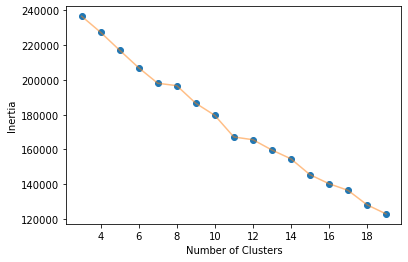

In [311]:
#visualization
plt.plot(np.arange(3,20),sse,'o')
plt.plot(np.arange(3,20),sse,'-',alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#####  As we have not found a particular elbow point in this case consider the number of clusters to be 10 and let's check out the items that goes into each cluster

In [228]:
# build the k-means model with k=10
kmeans=KMeans(n_clusters=10,init='k-means++',random_state=42)
kmeans.fit(feature)

KMeans(n_clusters=10, random_state=42)

In [276]:
cluster=pd.DataFrame()
cluster['Item_id']=feature.index
cluster['cluster_no']=kmeans.labels_

In [319]:
final=pd.merge(cluster,item,on='Item_id',how='left')
final

,Item_id,cluster_no,Item_name
0,1,0,sugar
1,2,6,lettuce
2,3,0,pet items
3,4,0,baby items
4,5,0,waffles
5,6,9,poultry
6,7,0,sandwich bags
7,8,0,butter
8,9,8,soda
9,10,0,carrots


In [320]:
final.to_csv('/Clustering grocery items /final.csv')